Notebook to analyse the climate and soil data extracted from QGIS and link to the corresponding municipalities

## Content
* Read files and checks
* Manipulation for final dataset

In [1]:
# For plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
import geopandas as gpd
import pandas as pd

# Read files and checks

## Shapefile with soil properties

In [5]:
path_to_municipalities_soil = './soil/shapefile municipalities_soil/municipalities_soil.shp'

In [6]:
municipalities_soil = gpd.read_file(path_to_municipalities_soil)
municipalities_soil.head()

,CCA_2,District,Municipali,CaCO3_coun,CaCO3_mean,CaCO3_medi,CaCO3_stde,CN_count,CN_mean,CN_median,...,N_stdev,P_count,P_mean,P_median,P_stdev,pH_count,pH_mean,pH_median,pH_stdev,geometry
0,0705,Évora,Évora,5164.0,11.156007,0.000000,18.450520,5164.0,11.309097,11.241041,...,0.239362,5164.0,18.367848,18.258904,8.616713,5164.0,6.096658,6.074847,0.308197,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506..."
1,0701,Évora,Alandroal,2082.0,16.432846,2.498584,26.755894,2082.0,10.941017,10.794536,...,0.304004,2082.0,9.674017,9.455447,5.401974,2082.0,6.089001,6.113493,0.247398,"POLYGON ((-7.25937 38.77351, -7.25921 38.77343..."
2,0702,Évora,Arraiolos,2710.0,8.331089,0.000000,14.961646,2710.0,11.672756,11.623805,...,0.209804,2710.0,15.007509,13.759467,8.637344,2710.0,5.990712,5.997008,0.205906,"POLYGON ((-7.88611 38.92495, -7.88580 38.92472..."
3,0703,Évora,Borba,568.0,43.019513,20.105740,56.110975,568.0,11.198196,10.982209,...,0.298087,568.0,10.459600,10.324636,5.806801,568.0,6.477992,6.327326,0.544822,"POLYGON ((-7.46362 38.92344, -7.46344 38.92329..."
4,0704,Évora,Estremoz,2047.0,25.280467,0.950433,37.258551,2047.0,11.820409,11.512837,...,0.330895,2047.0,9.686767,9.356781,6.265495,2047.0,6.164190,6.070422,0.481164,"POLYGON ((-7.52770 39.00080, -7.52765 39.00066..."


Rename columns for CaCO3 to have complete name of statistics

In [7]:
cols_to_rename = {'CaCO3_coun': 'CaCO3_count',  'CaCO3_medi': 'CaCO3_median', 'CaCO3_stde': 'CaCO3_stdev'}
municipalities_soil.rename(columns=cols_to_rename, inplace=True)

In [8]:
description_soil = municipalities_soil.describe()
description_soil

,CaCO3_count,CaCO3_mean,CaCO3_median,CaCO3_stdev,CN_count,CN_mean,CN_median,CN_stdev,N_count,N_mean,N_median,N_stdev,P_count,P_mean,P_median,P_stdev,pH_count,pH_mean,pH_median,pH_stdev
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,1246.978417,26.662406,20.187438,23.566685,1246.946043,14.286225,14.135120,1.726892,1246.953237,1.700274,1.658383,0.408132,1246.978417,17.528319,16.948973,7.437024,1246.946043,5.781619,5.760319,0.353025
std,1124.822357,29.424491,30.312028,15.693099,1124.838379,2.227829,2.318180,0.548028,1124.841185,0.453111,0.450331,0.175334,1124.822357,7.228032,7.704473,1.851203,1124.838379,0.542594,0.568290,0.107768
min,27.000000,0.858802,0.000000,2.491999,27.000000,10.109032,10.063775,0.575286,27.000000,0.564628,0.530012,0.126861,27.000000,1.365395,0.000000,2.277507,27.000000,4.923223,4.891536,0.150299
25%,526.250000,7.674920,0.000000,12.324900,526.250000,12.320235,12.007854,1.413005,526.250000,1.396384,1.366987,0.282975,526.250000,12.155444,11.439029,6.362781,526.250000,5.292260,5.241026,0.276536
50%,888.000000,16.467996,7.784686,19.447264,888.000000,14.533672,14.293465,1.729169,888.000000,1.600869,1.552172,0.395123,888.000000,17.404512,16.367515,7.319517,888.000000,5.698562,5.692397,0.337388
75%,1587.250000,33.454342,25.743368,30.821354,1587.250000,16.208565,16.180738,2.028830,1587.250000,2.094386,2.061052,0.505221,1587.250000,22.454243,21.933220,8.620052,1587.250000,6.153627,6.105204,0.411635
max,6783.000000,174.955114,186.370209,85.842297,6783.000000,19.019662,20.105214,3.489399,6783.000000,3.443069,3.200284,1.283641,6783.000000,41.664858,41.033440,13.304542,6783.000000,7.267271,7.312079,0.745915


The count columns are not all exactly the same but really similar. Only one kept.

In [9]:
cols_with_count = ['CaCO3_count', 'CN_count', 'N_count', 'P_count', 'pH_count']

In [10]:
# Check they are not the same
check = True
for i in range(len(cols_with_count) - 1):
    check = municipalities_soil[cols_with_count[i]].equals(municipalities_soil[cols_with_count[i+1]])
print(check)

False


In [11]:
municipalities_soil['count'] = municipalities_soil['CaCO3_count']

In [12]:
municipalities_soil.drop(cols_with_count, axis=1, inplace=True)

Check on descriptive statistics

In [13]:
cols_with_mean_soil = [col for col in municipalities_soil.columns if 'mean' in col]

In [14]:
print(description_soil.loc['min', cols_with_mean_soil])
print(description_soil.loc['max', cols_with_mean_soil])

CaCO3_mean     0.858802
CN_mean       10.109032
N_mean         0.564628
P_mean         1.365395
pH_mean        4.923223
Name: min, dtype: float64
CaCO3_mean    174.955114
CN_mean        19.019662
N_mean          3.443069
P_mean         41.664858
pH_mean         7.267271
Name: max, dtype: float64


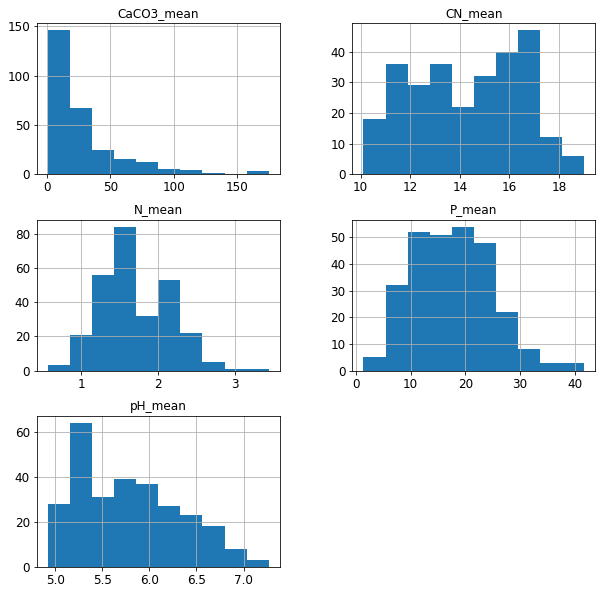

In [15]:
municipalities_soil[cols_with_mean_soil].hist(figsize=(10,10))
plt.show()

No issue found

## Shapefile with climate properties

In [16]:
path_to_municipalities_climate = './climate/shapefile municipalities_climate/municipalities_climate.shp'

In [17]:
municipalities_climate = gpd.read_file(path_to_municipalities_climate)
municipalities_climate.head()

,CCA_2,District,Municipali,95_at_coun,95_at_mean,95_at_stde,95_at20_me,95_at20_st,95_at25_me,95_at25_st,...,18_nt_stde,18_nt0_mea,18_nt0_std,18_pr_mean,18_pr_stde,18_0pr_mea,18_0pr_std,18_x0pr_me,18_x0pr_st,geometry
0,0705,Évora,Évora,13.0,1705.632484,21.531901,12684.615385,597.232275,3276.923077,211.783075,...,21.213890,146.153846,190.607872,4365.846229,150.986071,3038.461538,7.692308,800.0,0.00000,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506..."
1,0701,Évora,Alandroal,6.0,1725.449748,16.486152,13316.666667,572.761343,3716.666667,291.070820,...,12.529725,933.333333,74.535599,3846.666585,209.251938,3058.333333,17.716910,810.0,22.36068,"POLYGON ((-7.25937 38.77351, -7.25921 38.77343..."
2,0702,Évora,Arraiolos,6.0,1685.054728,13.275095,12083.333333,371.558280,3250.000000,160.727513,...,16.208629,66.666667,74.535599,4630.833008,133.652880,3011.666667,10.671874,800.0,0.00000,"POLYGON ((-7.88611 38.92495, -7.88580 38.92472..."
3,0703,Évora,Borba,2.0,1640.185730,3.456482,11400.000000,200.000000,3250.000000,50.000000,...,3.423309,900.000000,100.000000,4148.999878,71.000122,3060.000000,10.000000,830.0,30.00000,"POLYGON ((-7.46362 38.92344, -7.46344 38.92329..."
4,0704,Évora,Estremoz,5.0,1652.168164,21.417788,11440.000000,500.399840,3240.000000,185.472370,...,16.020215,620.000000,172.046505,4298.999902,78.737944,3044.000000,8.000000,800.0,0.00000,"POLYGON ((-7.52770 39.00080, -7.52765 39.00066..."


Rename count columns

In [18]:
municipalities_climate.rename(columns={'95_at_coun': 'pixel_count'}, inplace=True)

Correct values modified by the warping tool in QGIS.

In [19]:
#cols_pr_d = [col for col in municipalities_climate.columns if '0pr' in col]
cols_pr = [col for col in municipalities_climate.columns if 'pr' in col]
#cols_pr_no_d = [col for col in cols_pr if col not in cols_pr_d]
cols_at = [col for col in municipalities_climate.columns if 'at' in col]
cols_xt = [col for col in municipalities_climate.columns if 'xt' in col]
cols_nt = [col for col in municipalities_climate.columns if 'nt' in col]

In [20]:
municipalities_climate[cols_pr] = municipalities_climate[cols_pr] / 10
municipalities_climate[cols_at] = municipalities_climate[cols_at] / 100
municipalities_climate[cols_xt] = municipalities_climate[cols_xt] / 100
municipalities_climate[cols_nt] = municipalities_climate[cols_nt] / 100

In [21]:
description_climate = municipalities_climate.describe()
description_climate

,pixel_count,95_at_mean,95_at_stde,95_at20_me,95_at20_st,95_at25_me,95_at25_st,95_xt_mean,95_xt_stde,95_xt_30me,...,18_nt_mean,18_nt_stde,18_nt0_mea,18_nt0_std,18_pr_mean,18_pr_stde,18_0pr_mea,18_0pr_std,18_x0pr_me,18_x0pr_st
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,...,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,0.034478,15.669606,0.354961,96.509001,5.715544,17.754925,2.419286,20.612812,0.393662,36.894778,...,10.290459,0.254352,6.211266,0.996756,644.289309,17.992008,286.918305,1.480101,47.901307,1.398802
std,0.029412,1.634451,0.313192,28.052560,4.312864,10.037919,2.153942,1.518075,0.355883,20.054948,...,1.663551,0.182065,7.543787,1.343629,217.104217,14.581505,15.276007,1.551643,24.375763,3.855206
min,0.000849,10.915314,0.000000,25.500000,0.000000,0.000000,0.000000,15.679421,0.000000,7.500000,...,6.911916,0.000000,0.000000,0.000000,310.200061,0.000000,253.256602,0.000000,31.000000,0.000000
25%,0.020000,14.555492,0.140979,72.625000,2.454548,9.666667,0.864718,19.546261,0.144147,20.031496,...,9.065139,0.124521,0.000000,0.000000,462.870844,7.557929,274.500000,0.500000,32.000000,0.000000
50%,0.020000,15.984174,0.240286,97.726667,4.500000,15.941827,1.826567,20.791367,0.278569,32.428370,...,9.900505,0.204267,2.793412,0.500000,588.130665,13.594116,287.500000,1.000000,40.000000,0.000000
75%,0.050000,17.044490,0.502082,118.392059,7.560783,25.375000,3.303028,21.779095,0.520081,48.406267,...,11.465541,0.343474,11.928571,1.585533,815.087347,25.530953,297.937500,1.881019,42.000000,0.412241
max,0.180000,18.110007,1.906565,152.333333,22.426770,43.500000,10.839742,23.599895,2.152765,95.500000,...,14.029329,1.030561,35.800000,8.818163,1198.038872,74.768812,316.000000,10.068321,129.000000,19.327585


Check on descriptive statistics

In [22]:
cols_with_mean_climate = [col for col in municipalities_climate.columns if '_me' in col]
cols_with_at_mean_climate = [col for col in cols_with_mean_climate if '_at_' in col]
cols_with_xt_mean_climate = [col for col in cols_with_mean_climate if '_xt_' in col]
cols_with_nt_mean_climate = [col for col in cols_with_mean_climate if '_nt_' in col]
cols_with_pr_mean_climate = [col for col in cols_with_mean_climate if '_pr_' in col]

C:\Users\giaco\anaconda3\envs\SBP_munic_data_manipulation\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


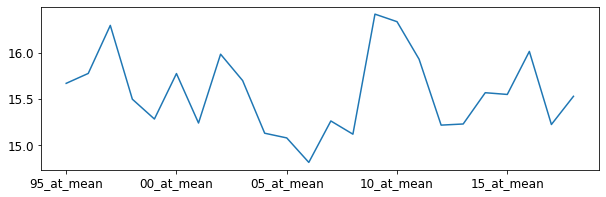

In [23]:
description_climate.loc['mean', cols_with_at_mean_climate].plot(figsize=(10,3))
plt.show()

C:\Users\giaco\anaconda3\envs\SBP_munic_data_manipulation\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


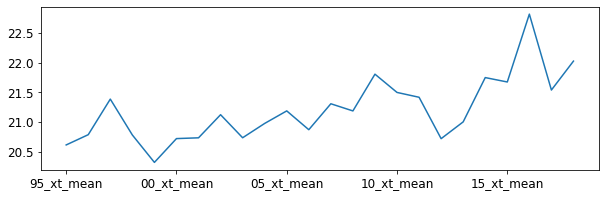

In [24]:
description_climate.loc['mean', cols_with_xt_mean_climate].plot(figsize=(10,3))
plt.show()

C:\Users\giaco\anaconda3\envs\SBP_munic_data_manipulation\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


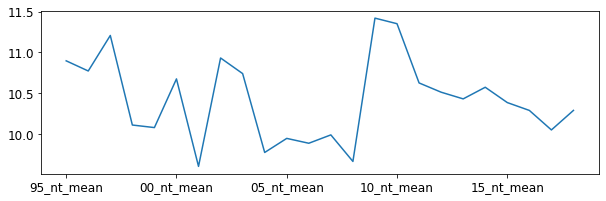

In [25]:
description_climate.loc['mean', cols_with_nt_mean_climate].plot(figsize=(10,3))
plt.show()

C:\Users\giaco\anaconda3\envs\SBP_munic_data_manipulation\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


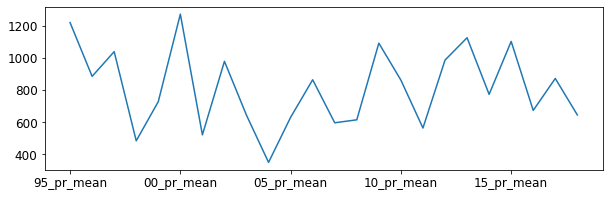

In [26]:
description_climate.loc['mean', cols_with_pr_mean_climate].plot(figsize=(10,3))
plt.show()

# Manipulation for final dataset

## Climate data

In [27]:
out_file_climate = "municipalities_climate_final.csv"

In [28]:
municipalities_climate_raw = municipalities_climate.drop(['geometry', 'District', 'CCA_2'], axis=1)

In [29]:
municipalities_climate_raw.rename(columns={'Municipali': 'Municipality'}, inplace=True)

In [30]:
municipalities_climate_raw.set_index('Municipality', inplace=True)

In [31]:
municipalities_climate_raw.drop(['pixel_count'], axis=1, inplace=True)

In [32]:
st_columns = [col for col in municipalities_climate_raw.columns if 'st' in col]
municipalities_climate_raw.drop(st_columns, axis=1, inplace=True)

In [33]:
municipalities_climate_raw.head()

,95_at_mean,95_at20_me,95_at25_me,95_xt_mean,95_xt_30me,95_nt_mean,95_nt0_mea,95_pr_mean,95_0pr_mea,95_x0pr_me,...,18_at_mean,18_at20_me,18_at25_me,18_xt_mean,18_xt_30me,18_nt_mean,18_nt0_mea,18_pr_mean,18_0pr_mea,18_x0pr_me
Municipality,,,,,,,,,,,,,,,,,,,,,
Évora,17.056325,126.846154,32.769231,22.652296,73.846154,11.497798,2.153846,862.292334,262.923077,104.0,...,16.663928,130.692308,32.769231,23.998573,98.307692,10.332087,1.461538,436.584623,303.846154,80.0
Alandroal,17.254497,133.166667,37.166667,23.137756,88.166667,11.361855,3.000000,752.533333,273.666667,104.0,...,17.069521,137.500000,49.166667,24.503726,113.333333,10.044429,9.333333,384.666659,305.833333,81.0
Arraiolos,16.850547,120.833333,32.500000,22.373658,69.333333,11.377250,1.833333,910.816553,260.666667,104.0,...,16.504957,126.666667,29.000000,23.686153,90.833333,10.470558,0.666667,463.083301,301.166667,80.0
Borba,16.401857,114.000000,32.500000,22.126520,74.500000,10.688882,4.000000,837.400000,269.000000,104.0,...,16.404905,130.000000,31.500000,23.649316,99.500000,9.766288,9.000000,414.899988,306.000000,83.0
Estremoz,16.521682,114.400000,32.400000,22.193637,72.600000,10.874162,3.800000,872.240000,265.400000,104.0,...,16.411328,127.600000,31.800000,23.642491,96.200000,9.953748,6.200000,429.899990,304.400000,80.0


In [37]:
municipalities_climate_raw.loc['Faro']

95_at_mean     17.739213
95_at20_me    137.213646
95_at25_me     12.055896
95_xt_mean     21.780273
95_xt_30me     26.027997
                 ...    
18_nt_mean     12.751897
18_nt0_mea      0.000000
18_pr_mean    361.028896
18_0pr_mea    315.442579
18_x0pr_me    124.504568
Name: Faro, Length: 240, dtype: float64

From this, I want to create a MultiIndex object whose first index is the municipality and the second is the year, with one column for each variable

In [38]:
municipalities = municipalities_climate_raw.index.tolist()
years = [i for i in range(1995, 2019)]

In [39]:
municipalities_climate = pd.MultiIndex.from_product([municipalities, years], names=['Municipality', 'Year'])

In [40]:
municipalities_climate = municipalities_climate.to_frame()

In [41]:
municipalities_climate.drop(['Municipality', 'Year'], axis=1, inplace=True)

In [42]:
column_variables = ['at_', 'at20', 'at25', 'xt_', 'xt_30', 'nt_', 'nt0_', '_pr_', '_0pr', '_x0pr']
municipalities_climate[column_variables] = None

In [43]:
cols_raw = municipalities_climate_raw.columns.to_list()

for munic in municipalities:
    for year in years:
        for prop in column_variables:
            for col in cols_raw:
                if str(year)[2:] in col and prop in col:
                    corresponding_col = col
            value = municipalities_climate_raw.loc[munic, corresponding_col]
            municipalities_climate.loc[(munic, year), prop] = value

Rename columns

In [44]:
dict_cols = {'at_': 'av_d_mean_t_pr_y_munic', 'at20': 'days_mean_t_over_20_pr_y_munic', 'at25': 'days_mean_t_over_25_pr_y_munic',
            'xt_': 'av_d_max_t_pr_y_munic', 'xt_30': 'days_max_t_over_30_pr_y_munic',
            'nt_': 'av_d_min_t_pr_y_munic', 'nt0_': 'days_min_t_under_0_pr_y_munic',
            '_pr_': 'av_prec_sum_pr_y_munic', '_0pr': 'days_no_prec_pr_y_munic', '_x0pr': 'cons_days_no_prec_pr_y_munic'}

In [45]:
municipalities_climate.rename(columns=dict_cols, inplace=True)

In [46]:
municipalities_climate.head()

av_d_mean_t_pr_y_munic days_mean_t_over_20_pr_y_munic  \
Municipality Year                                                         
Évora        1995                17.0563                        126.846   
             1996                17.1152                        95.2308   
             1997                17.5703                        124.538   
             1998                 16.879                        127.154   
             1999                16.5285                        111.692   

                  days_mean_t_over_25_pr_y_munic av_d_max_t_pr_y_munic  \
Municipality Year                                                        
Évora        1995                        32.7692               73.8462   
             1996                        23.2308               46.6923   
             1997                        42.0769               82.2308   
             1998                        31.4615               78.0769   
             1999                        27.6923               69.7692   

                  days_max_t_over_30_pr_y_munic av_d_min_t_pr_y_munic  \
Municipality Year                                                       
Évora        1995                       73.8462               11.4978   
             1996                       46.6923               11.5021   
             1997                       82.2308               11.9909   
             1998                       78.0769               10.7328   
             1999                       69.7692               10.9102   

                  days_min_t_under_0_pr_y_munic av_prec_sum_pr_y_munic  \
Municipality Year                                                        
Évora        1995                       2.15385                862.292   
             1996                             0                734.862   
             1997                             0                814.815   
             1998                      0.307692                351.408   
             1999                      0.230769                609.369   

                  days_no_prec_pr_y_munic cons_days_no_prec_pr_y_munic  
Municipality Year                                                       
Évora        1995                 262.923                          104  
             1996                 290.923                      68.7692  
             1997                 276.077                           91  
             1998                     316                           81  
             1999                 294.769                           83

In [47]:
municipalities_climate.to_csv(out_file_climate)

To read the file as the same format:

In [48]:
read_file = pd.read_csv(out_file_climate, index_col=['Municipality', 'Year'])
read_file.head()

av_d_mean_t_pr_y_munic  days_mean_t_over_20_pr_y_munic  \
Municipality Year                                                           
Évora        1995               17.056325                      126.846154   
             1996               17.115181                       95.230769   
             1997               17.570320                      124.538462   
             1998               16.878969                      127.153846   
             1999               16.528505                      111.692308   

                   days_mean_t_over_25_pr_y_munic  av_d_max_t_pr_y_munic  \
Municipality Year                                                          
Évora        1995                       32.769231              73.846154   
             1996                       23.230769              46.692308   
             1997                       42.076923              82.230769   
             1998                       31.461538              78.076923   
             1999                       27.692308              69.769231   

                   days_max_t_over_30_pr_y_munic  av_d_min_t_pr_y_munic  \
Municipality Year                                                         
Évora        1995                      73.846154              11.497798   
             1996                      46.692308              11.502058   
             1997                      82.230769              11.990863   
             1998                      78.076923              10.732784   
             1999                      69.769231              10.910206   

                   days_min_t_under_0_pr_y_munic  av_prec_sum_pr_y_munic  \
Municipality Year                                                          
Évora        1995                       2.153846              862.292334   
             1996                       0.000000              734.861512   
             1997                       0.000000              814.815366   
             1998                       0.307692              351.407709   
             1999                       0.230769              609.369250   

                   days_no_prec_pr_y_munic  cons_days_no_prec_pr_y_munic  
Municipality Year                                                         
Évora        1995               262.923077                    104.000000  
             1996               290.923077                     68.769231  
             1997               276.076923                     91.000000  
             1998               316.000000                     81.000000  
             1999               294.769231                     83.000000

 ### Extract average climate over the period


In [49]:
average_climate_1995_2018 = municipalities_climate.groupby('Municipality').mean(numeric_only=False)

Change columns names

In [50]:
'av_d_mean_t_pr_y_munic'.replace('pr_y', 'average')

'av_d_mean_t_average_munic'

In [51]:
new_cols = []
for cols in average_climate_1995_2018.columns:
    new_cols.append(cols.replace('pr_y', 'average'))
cols_dict = dict(zip(average_climate_1995_2018.columns, new_cols))
average_climate_1995_2018.rename(columns=cols_dict, inplace=True)

In [52]:
average_climate_1995_2018.head()

,av_d_mean_t_average_munic,days_mean_t_over_20_average_munic,days_mean_t_over_25_average_munic,av_d_max_t_average_munic,days_max_t_over_30_average_munic,av_d_min_t_average_munic,days_min_t_under_0_average_munic,av_prec_sum_average_munic,days_no_prec_average_munic,cons_days_no_prec_average_munic
Municipality,,,,,,,,,,
Abrantes,16.596448,116.611111,26.902778,66.534722,66.534722,11.317640,0.937500,685.084722,289.652778,68.951389
Aguiar da Beira,13.713492,76.152778,14.097222,48.444444,48.444444,8.014950,24.041667,718.101411,283.472222,54.833333
Alandroal,17.106057,132.423611,47.520833,96.562500,96.562500,10.789865,5.256944,524.231945,298.458333,77.166667
Albergaria-a-Velha,15.510948,84.125000,11.937500,35.395833,35.395833,10.264881,4.958333,1010.233322,269.604167,51.958333
Albufeira,17.700788,133.111201,27.460015,51.993884,51.993884,13.270923,0.000000,539.082619,303.869243,86.777473


#### Save file

In [53]:
out_file_average_climate = "municipalities_average_climate_final.csv"

In [54]:
average_climate_1995_2018.to_csv(out_file_average_climate)

## Soil data

In [55]:
out_file_soil = "municipalities_soil_final.csv"

In [56]:
cols_to_drop_gen = ['District', 'CCA_2', 'count', 'geometry']
cols_not_mean = [col for col in municipalities_soil.columns if 'median' in col or 'stdev' in col]
cols_to_drop = cols_to_drop_gen + cols_not_mean

In [57]:
municipalities_soil = municipalities_soil.drop(cols_to_drop, axis=1)

In [58]:
municipalities_soil.rename(columns={'Municipali': 'Municipality'}, inplace=True)

In [59]:
municipalities_soil.set_index('Municipality', inplace=True)

In [60]:
new_cols = []
for cols in municipalities_soil.columns:
    new_cols.append(cols + '_munic')
cols_dict = dict(zip(municipalities_soil.columns, new_cols))
municipalities_soil.rename(columns=cols_dict, inplace=True)

In [61]:
municipalities_soil.head()

,CaCO3_mean_munic,CN_mean_munic,N_mean_munic,P_mean_munic,pH_mean_munic
Municipality,,,,,
Évora,11.156007,11.309097,1.482780,18.367848,6.096658
Alandroal,16.432846,10.941017,1.729694,9.674017,6.089001
Arraiolos,8.331089,11.672756,1.398242,15.007509,5.990712
Borba,43.019513,11.198196,1.681893,10.459600,6.477992
Estremoz,25.280467,11.820409,1.676325,9.686767,6.164190


In [62]:
municipalities_soil.to_csv(out_file_soil)